# Proyek Analisis Data : Bike-sharing-dataset

- Nama        : Ahmad Miftahul Farohi
- Email       : miftahulfarohi25@gmail.com
- Id Dicoding : mieffarohi

## Menentukan Pertanyaan Bisnis

Berdasarkan data, terdapat beberapa pertanyaan yang dapat dirumuskan, yaitu sebagai berikut.
- Berdasarkan tanggal, kapan waktu dengan jumlah peminjaman sepeda paling banyak dan paling sedikit?
- Bagaimana perbandingan tren antara peminjam kasual dan peminjam terdaftar sepanjang tahun 2012?
- Apakah terdapat korelasi antara musim dengan total peminjaman sepeda?
- Bagaimana pengaruh kondisi berat (weaterist 4 : Hujan lebat + Pecahan Es + Petir + Kabut, Salju + Kabut) terhadap jumlah peminjaman sepeda?
- Adakah perbedaan signifikan dalam jumlah peminjaman sepeda antara hari kerja dan hari libur?
- Bagaimana distribusi peminjaman sepeda pada jam-jam sibuk (misalnya, jam berapa dalam sehari) dibandingkan dengan jam-jam sepi?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gahtering Data

In [3]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

Assessing day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Assessing hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data

Cleaning Data day_df

In [11]:
# terdapat kesalahan tipe data untuk kolom dteday
# mengganti tipe data pada kolom dteday menjadi datetime
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Karena pada data terdapat nilai 'cnt' yang cukup jauh dari nilai yang lain, maka kita identifikasi,
apakah nilai tersebut merupakan outlier atau bukan.

In [40]:
# Identifikasi outlier dengan IQR
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-1054.0
10162.0


In [41]:
# Identifikasi dan hapus outlier
outliers = day_df[(day_df['cnt'] < lower_bound) | (day_df['cnt'] > upper_bound)]
df_cleaned = day_df[~((day_df['cnt'] < lower_bound) | (day_df['cnt'] > upper_bound))]

# Tampilkan hasil setelah membersihkan outlier
print("Data setelah membersihkan outlier:")
print(df_cleaned)

Data setelah membersihkan outlier:
     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual

Cleaning Data hour_df

In [13]:
# terdapat kesalahan tipe data untuk kolom dteday
# mengganti tipe data pada kolom dteday menjadi datetime
datetime_columns_hour = ["dteday"]
 
for column in datetime_columns_hour:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Karena pada data terdapat nilai 'cnt' yang cukup jauh dari nilai yang lain, maka kita identifikasi, apakah nilai tersebut merupakan outlier atau bukan.

In [42]:
# Identifikasi outlier dengan IQR
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-321.5
642.5


In [43]:
# Identifikasi dan hapus outlier
outliers = hour_df[(hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound)]
df_cleaned = hour_df[~((hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound))]

# Tampilkan hasil setelah membersihkan outlier
print("Data setelah membersihkan outlier:")
print(df_cleaned)

Data setelah membersihkan outlier:
       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1         

# Exploratory Data Analysis

## Menentukan Pertanyaan

Berdasarkan data, terdapat beberapa pertanyaan yang dapat dirumuskan, yaitu sebagai berikut.
- Berdasarkan tanggal, kapan waktu dengan jumlah peminjaman sepeda paling banyak dan paling sedikit?
- Bagaimana perbandingan tren antara peminjam kasual dan peminjam terdaftar sepanjang tahun 2012?
- Apakah terdapat korelasi antara musim dengan total peminjaman sepeda?
- Bagaimana pengaruh kondisi berat (weaterist 4 : Hujan lebat + Pecahan Es + Petir + Kabut, Salju + Kabut) terhadap jumlah peminjaman sepeda?
- Adakah perbedaan signifikan dalam jumlah peminjaman sepeda antara hari kerja dan hari libur?
- Bagaimana distribusi peminjaman sepeda pada jam-jam sibuk (misalnya, jam berapa dalam sehari) dibandingkan dengan jam-jam sepi?

## Melakukan Eksplorasi Data

### Eksplorasi Data day_df

In [15]:
day_df.describe(include="all")

C:\Users\user\AppData\Local\Temp\ipykernel_17852\282069457.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Demografi catatan peminjaman berdasarkan tanggal dan jumlah sepeda dipinjam, dari yang terbesar ke terkecil

In [31]:
day_df.groupby(by="dteday").agg({
    "instant": "nunique",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,instant,cnt
dteday,,
2012-09-15,1,8714
2012-09-29,1,8555
2012-09-22,1,8395
2012-03-23,1,8362
2012-05-19,1,8294
...,...,...
2011-03-06,1,605
2011-01-26,1,506
2012-12-26,1,441


Melihat jumlah peminjaman tahun 2012 berdasarkan kategori peminjam (kasual dan terdaftar).
Ket: pada kolom 'yr', 0 = 2011, 1 = 2012

In [49]:
# Filter data untuk tahun 2012
year_2012_df = day_df[day_df['yr'] == 1]

# Grouping dan aggregating untuk melihat tren
trend_df = year_2012_df.groupby(by="dteday").agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

# Menampilkan hasil
print(trend_df)

        dteday  casual  registered
0   2012-01-01     686        1608
1   2012-01-02     244        1707
2   2012-01-03      89        2147
3   2012-01-04      95        2273
4   2012-01-05     140        3132
..         ...     ...         ...
361 2012-12-27     247        1867
362 2012-12-28     644        2451
363 2012-12-29     159        1182
364 2012-12-30     364        1432
365 2012-12-31     439        2290

[366 rows x 3 columns]


Melihat jumlah peminjaman sepeda berdasarkan musim

In [50]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": "sum"
})

,instant,cnt
season,,
1,181,471348
2,184,918589
3,188,1061129
4,178,841613


Melihat jumlah peminjaman sepeda berdasarkan cuaca

In [53]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": "sum"
})

,instant,cnt
weathersit,,
1,463,2257952
2,247,996858
3,21,37869


Melihat jumlah peminjaman sepeda berdasarkan working day. Bukan akhir pekan/hari libur = 1, hari libur/akhir pekan = 0.

In [54]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": "sum"
})

,instant,cnt
workingday,,
0,231,1000269
1,500,2292410


### Eksplorasi Data hour_df

In [55]:
hour_df.describe(include="all")

C:\Users\user\AppData\Local\Temp\ipykernel_17852\1264340832.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [56]:
hour_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": "sum"
})

,instant,cnt
weathersit,,
1,11413,2338173
2,4544,795952
3,1419,158331
4,3,223


In [57]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": "sum"
})

,instant,cnt
hr,,
0,726,39130
1,724,24164
2,715,16352
3,697,8174
4,697,4428
5,717,14261
6,725,55132
7,727,154171
8,727,261001


### Eksplorasi Data day_df dan hour_df

In [58]:
# menyatukan (merge) tabel day_df dan hour_df
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left", # gabungkan tabel dengan left join
    left_on="instant",
    right_on="instant"
)
day_hour_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [61]:
day_hour_df['hr']

0       0
1       1
2       2
3       3
4       4
       ..
726    15
727    16
728    17
729    18
730    19
Name: hr, Length: 731, dtype: int64

In [67]:
day_hour_df.groupby(by="dteday_x").agg({
    "instant": "nunique",
    "hr": "nunique",
    "casual_x" : "sum",
    "casual_y" : "sum",
    "registered_x" : "sum",
    "registered_y" : "sum",
    "cnt_x" : "sum",
    "cnt_y" : "sum"
})

,instant,hr,casual_x,casual_y,registered_x,registered_y,cnt_x,cnt_y
dteday_x,,,,,,,,
2011-01-01,1,1,331,3,654,13,985,16
2011-01-02,1,1,131,8,670,32,801,40
2011-01-03,1,1,120,5,1229,27,1349,32
2011-01-04,1,1,108,3,1454,10,1562,13
2011-01-05,1,1,82,0,1518,1,1600,1
...,...,...,...,...,...,...,...,...
2012-12-27,1,1,247,10,1867,66,2114,76
2012-12-28,1,1,644,8,2451,95,3095,103
2012-12-29,1,1,159,7,1182,183,1341,190


# Membuat Visualisasi Data

## Berdasarkan tanggal, kapan waktu dengan jumlah peminjaman sepeda paling banyak dan paling sedikit?

In [70]:
day_df.groupby(by="dteday").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False).head(5)

,cnt
dteday,
2012-09-15,8714
2012-09-29,8555
2012-09-22,8395
2012-03-23,8362
2012-05-19,8294


In [71]:
day_df.groupby(by="dteday").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=True).head(5)

,cnt
dteday,
2012-10-29,22
2011-01-27,431
2012-12-26,441
2011-01-26,506
2011-03-06,605


In [74]:
# Jumlah peminjaman terbanyak
max_rental_date = day_df.loc[day_df['cnt'].idxmax()]['dteday']
max_rental_count = day_df.loc[day_df['cnt'].idxmax()]['cnt']

# Jumlah peminjaman paling sedikit
min_rental_date = day_df.loc[day_df['cnt'].idxmin()]['dteday']
min_rental_count = day_df.loc[day_df['cnt'].idxmin()]['cnt']

print("Waktu dengan jumlah peminjaman terbanyak:", max_rental_date, "dengan jumlah peminjam sebanyak", max_rental_count)
print("Waktu dengan jumlah peminjaman paling sedikit:", min_rental_date, "dengan jumlah peminjam sebanyak", min_rental_count)

Waktu dengan jumlah peminjaman terbanyak: 2012-09-15 00:00:00 dengan jumlah peminjam sebanyak 8714
Waktu dengan jumlah peminjaman paling sedikit: 2012-10-29 00:00:00 dengan jumlah peminjam sebanyak 22


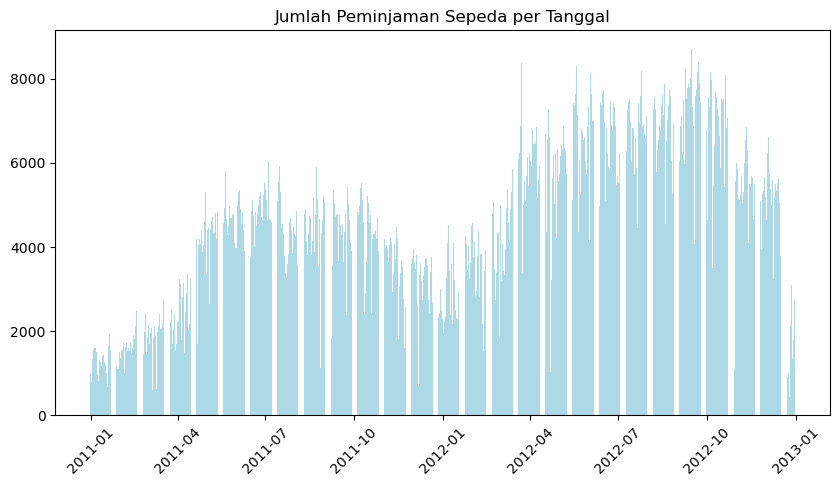

In [83]:
# Visualisasi Waktu dengan Jumlah Peminjaman Terbanyak dan Paling Sedikit
plt.figure(figsize=(10, 5))
plt.bar(day_df['dteday'], day_df['cnt'], color='lightblue')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah Peminjaman Sepeda per Tanggal')
plt.xticks(rotation=45)
plt.show()

## Bagaimana perbandingan tren antara peminjam kasual dan peminjam terdaftar sepanjang tahun 2012?

In [84]:
# Filter data untuk tahun 2012
year_2012_df = day_df[day_df['yr'] == 1]

# Grouping dan aggregating untuk melihat tren
trend_df = year_2012_df.groupby(by="dteday").agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

# Menampilkan hasil
print(trend_df)

        dteday  casual  registered
0   2012-01-01     686        1608
1   2012-01-02     244        1707
2   2012-01-03      89        2147
3   2012-01-04      95        2273
4   2012-01-05     140        3132
..         ...     ...         ...
361 2012-12-27     247        1867
362 2012-12-28     644        2451
363 2012-12-29     159        1182
364 2012-12-30     364        1432
365 2012-12-31     439        2290

[366 rows x 3 columns]


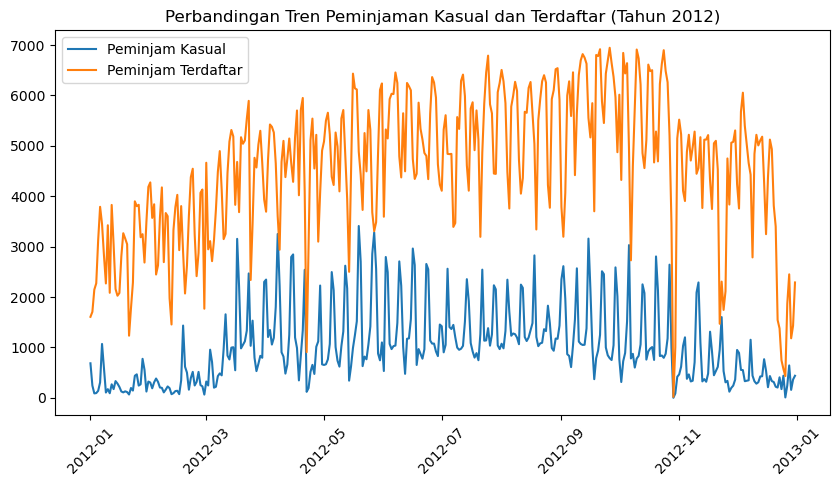

In [86]:
# Visualisasi Perbandingan Tren antara Peminjam Kasual dan Peminjam Terdaftar Tahun 2012
plt.figure(figsize=(10, 5))
plt.plot(trend_df['dteday'], trend_df['casual'], label='Peminjam Kasual')
plt.plot(trend_df['dteday'], trend_df['registered'], label='Peminjam Terdaftar')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Perbandingan Tren Peminjaman Kasual dan Terdaftar (Tahun 2012)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Apakah terdapat korelasi antara musim dengan total peminjaman sepeda?

In [120]:
# Korelasi per musim
musim = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']
korelasi = [day_df[day_df['season'] == i]['cnt'].corr(day_df[day_df['season'] == i]['cnt']) for i in range(1, 5)]

print(korelasi)

[1.0, 0.9999999999999999, 1.0, 1.0]


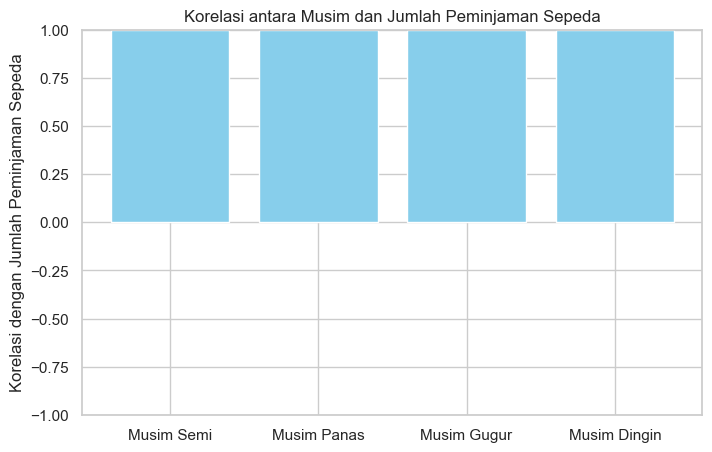

In [121]:

# Membuat diagram batang
plt.figure(figsize=(8, 5))
plt.bar(musim, korelasi, color='skyblue')
plt.xlabel(None)
plt.ylabel('Korelasi dengan Jumlah Peminjaman Sepeda')
plt.title('Korelasi antara Musim dan Jumlah Peminjaman Sepeda')
plt.ylim([-1, 1])  # Memastikan rentang sumbu y dari -1 hingga 1
plt.show()

## Bagaimana pengaruh kondisi berat (weaterist 4 : Hujan lebat + Pecahan Es + Petir + Kabut, Salju + Kabut) terhadap jumlah peminjaman sepeda? -- (Pada hour_df)

In [97]:
# Filter data untuk weathersit 4 pada hour_df
heavy_weather_df = hour_df[hour_df['weathersit'] == 4]

# Jumlah peminjaman saat kondisi berat
total_rentals_heavy_weather = heavy_weather_df['cnt'].sum()

print("Total peminjaman saat kondisi berat:", total_rentals_heavy_weather)

Total peminjaman saat kondisi berat: 223


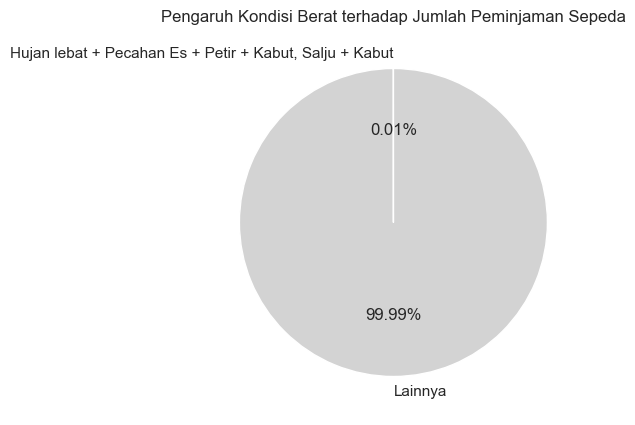

In [112]:
import seaborn as sns

# Visualisasi Pengaruh Kondisi Berat terhadap Jumlah Peminjaman Sepeda
labels = ['Hujan lebat + Pecahan Es + Petir + Kabut, Salju + Kabut', 'Lainnya']
sizes = [total_rentals_heavy_weather, day_df['cnt'].sum() - total_rentals_heavy_weather]
colors = ['lightcoral', 'lightgrey']

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Pengaruh Kondisi Berat terhadap Jumlah Peminjaman Sepeda')
plt.show()

## Adakah perbedaan signifikan dalam jumlah peminjaman sepeda antara hari kerja dan hari libur?

In [101]:
# Grouping dan aggregating untuk melihat perbedaan
workday_vs_holiday = day_df.groupby(by="workingday").agg({
    "cnt": "sum"
}).reset_index()

# Menampilkan hasil
print(workday_vs_holiday)

   workingday      cnt
0           0  1000269
1           1  2292410


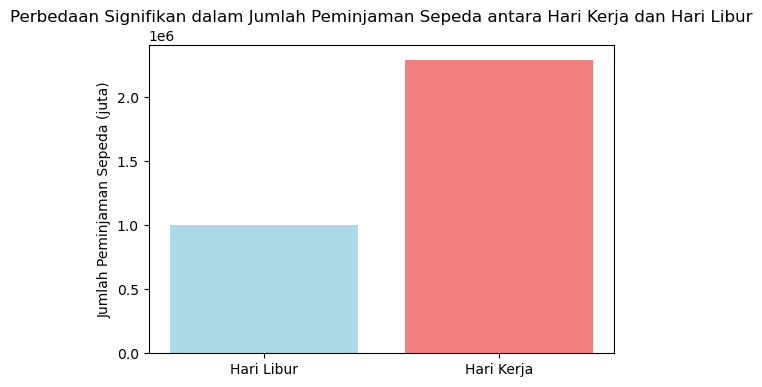

In [104]:
# Visualisasi Perbedaan Signifikan dalam Jumlah Peminjaman Sepeda antara Hari Kerja dan Hari Libur
plt.figure(figsize=(6, 4))
plt.bar(workday_vs_holiday['workingday'], workday_vs_holiday['cnt'], color=['lightblue', 'lightcoral'])
plt.xlabel(None)
plt.ylabel('Jumlah Peminjaman Sepeda (juta)')
plt.title('Perbedaan Signifikan dalam Jumlah Peminjaman Sepeda antara Hari Kerja dan Hari Libur')
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.show()

## Bagaimana distribusi peminjaman sepeda pada jam-jam sibuk (misalnya, jam berapa dalam sehari) dibandingkan dengan jam-jam sepi?

In [106]:
# Grouping dan aggregating untuk melihat distribusi pada jam
hourly_distribution = hour_df.groupby(by="hr").agg({
    "cnt": "sum"
}).reset_index()

# Menampilkan hasil
print(hourly_distribution)

    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


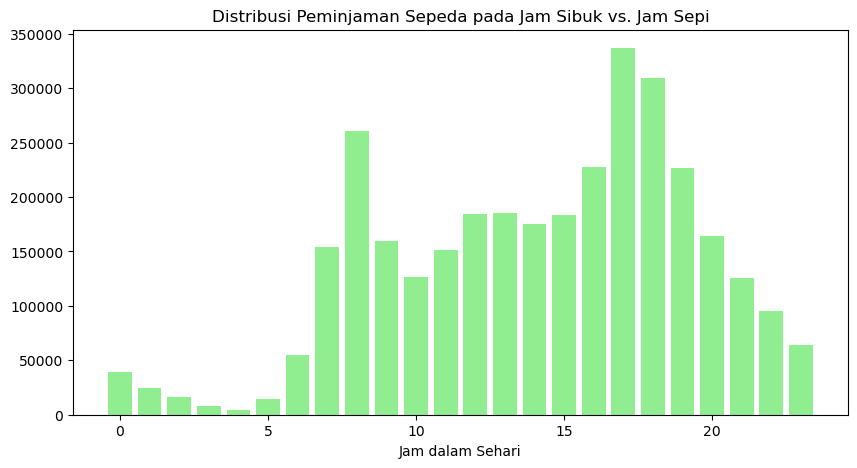

In [108]:
# Visualisasi Distribusi Peminjaman Sepeda pada Jam Sibuk vs. Jam Sepi
plt.figure(figsize=(10, 5))
plt.bar(hourly_distribution['hr'], hourly_distribution['cnt'], color='lightgreen')
plt.xlabel('Jam dalam Sehari')
plt.ylabel(None)
plt.title('Distribusi Peminjaman Sepeda pada Jam Sibuk vs. Jam Sepi')
plt.show()

In [114]:
day_hour_df.to_csv("all_data.csv", index=False)

## Conclusion

- Waktu dengan jumlah peminjaman terbanyak adalah pada tanggal **15 September 2012** dengan jumlah peminjam sebanyak **8714**. Sedangkan waktu dengan jumlah peminjaman paling sedikit adalah pada tanggal **29 Oktober 2012** dengan jumlah peminjam sebanyak **22**.
- Jumlah peminjam terdaftar selalu lebih banyak dari peminjam kasual. Meskipun begitu, kedua tren tersebut sama-sama mengalami kenaikan dan penurunan yang cukup signifikan.
- Terdapat korelasi yang signifikan antara data per musim (Semi, Panas, Gugur, Dingin) dengan data jumlah peminjaman sepeda dengan masing-masing hasil korelasi **[1.0, 0.9999999999999999, 1.0, 1.0]**.
- Kondisi berat (weaterist 4 : Hujan lebat + Pecahan Es + Petir + Kabut, Salju + Kabut) dalam jam hanya berpengaruh **sangat sedikit** terhadap jumlah peminjaman sepeda, yakni hanya sekitar **0,01%**.
- Terdapat perbedaan yang signifikan antara hari kerja dan hari libur terhadap jumlah peminjaman sepeda, di mana orang-orang **lebih banyak meminjam sepeda pada hari kerja** dibanding pada hari libur.
- Distribusi peminjaman sepeda **lebih sibuk/lebih banyak** terjadi pada jam **ke-17, 18, dan 8**. Sedangkan peminjaman sepeda **lebih sepi/lebih sedikit** terjadi pada jam **ke-4, 3, dan 2**.